# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import binom
from scipy import stats

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [4]:
# Your code here
from scipy.stats import normaltest

mu, sigma = 50, 5 # mean and standard deviation
s_10 = np.random.normal(mu, sigma, 10)
s_50 = np.random.normal(mu, sigma, 50)
s_500 = np.random.normal(mu, sigma, 500)
s_5000 = np.random.normal(mu, sigma, 5000)

print(normaltest(s_10))
print(normaltest(s_50))
print(normaltest(s_500))
print(normaltest(s_5000))

NormaltestResult(statistic=0.8294973846440784, pvalue=0.6605062501414143)
NormaltestResult(statistic=11.299237011966285, pvalue=0.0035188589425141307)
NormaltestResult(statistic=1.793910980196983, pvalue=0.40780935126432927)
NormaltestResult(statistic=2.0412412467550274, pvalue=0.3603712159548148)


#### Interpret the normaltest results and make your observations.

**h0 = asumimos que nuestra muestra sigue una distribucion normal**

Entonces viendo los p-value no podemos rechazar h0 en resultados 1,3 y 4

Pero rechazamos h0 para opt 2

Por tanto solo la seria una muestra con distr no normal y si skewed

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([  21.,  120.,  419.,  943., 1370., 1186.,  642.,  225.,   64.,
          10.]),
 array([33.58538886, 37.03001869, 40.47464852, 43.91927836, 47.36390819,
        50.80853802, 54.25316785, 57.69779769, 61.14242752, 64.58705735,
        68.03168718]),
 <a list of 10 Patch objects>)

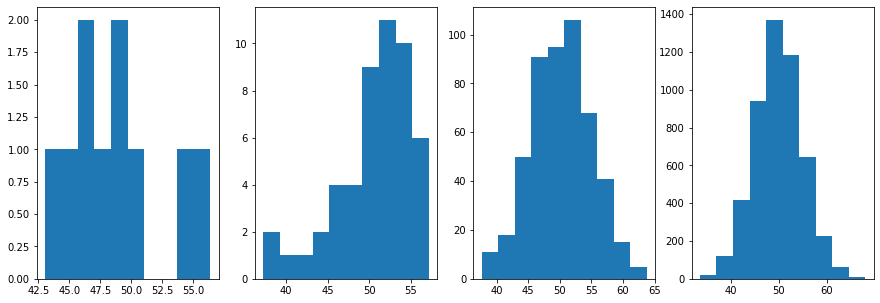

In [5]:
# Your code here
fig, axes = plt.subplots(1,4, figsize= (15,5))
plt.sca(axes[0])
plt.hist(s_10)
plt.sca(axes[1])
plt.hist(s_50)
plt.sca(axes[2])
plt.hist(s_500)
plt.sca(axes[3])
plt.hist(s_5000)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

https://economipedia.com/definiciones/teorema-central-del-limite.html

El CLT afirma que a medida que la muestra aumenta, la media se acercara cada vez mas a la media poblacional
y por tanto la distribucion sera cada vez mas normal

En este caso se cumple, excepto en el punto dos, que es menos normal que es uno teniendo un muestra mayor

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

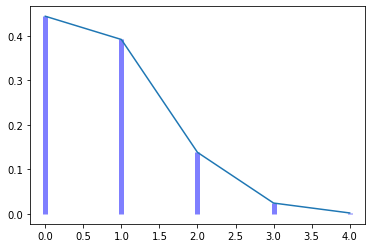

In [7]:
# https://economipedia.com/definiciones/distribucion-binomial.html

from scipy.stats import binom

n = 5 #muestra
p = 0.15

fig, ax = plt.subplots(1, 1)

x = range(5) #numero de exitos, en este caso, al no tener x, sera la prob de cada numero del 0-5

ax.plot(x, binom.pmf(x, n, p), '-', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#### Explain what you observe from the plot above

La probabilidad de mas personas vean el anuncio va disminuyendo a medida que aumenta el numero de personas

Por tanto la probabilidad de que 0 lo vean es alta >0.4, de que 1 lo vea .4, y asi va disminuyendo

#### Now plot PMP with 50, 500, and 5000 visitors.

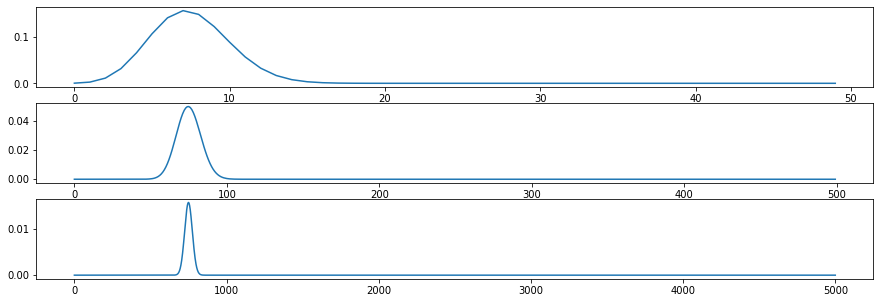

In [9]:
# Your code here

fig, axes = plt.subplots(3,1, figsize=(15,5))

plt.sca(axes[0])
plt.plot(range(50), binom.pmf(range(50), 50, .15), '-', ms=8, label='binom pmf')

plt.sca(axes[1])
plt.plot(range(500), binom.pmf(range(500), 500, .15), '-', ms=8, label='binom pmf')

plt.sca(axes[2])
plt.plot(range(5000), binom.pmf(range(5000), 5000, .15), '-', ms=8, label='binom pmf')

#### What did you notice from the distribution plots? Comment your findings.

Aqui observamos que a medida que aumenta la muestra las probabilidades de que 0 personas vean el video van disminuyendo. Sin embargo, tambien una vez alcanzado un pico, que se situa en 7 para 50, 70 para 500, ect, es decir; un 15% del total de la poblacion, a partir de ahi, la probabilidad es menor

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

https://www.slideshare.net/ofeliapaola/cuadros-comparativos-de-distribucion-poisson-y-distribucion-binomial

La distribucion Poisson es similar Bernoulli, pero tiene ciertas diferencias:
  
- La muestra tiende a ser mas grande y la prob mas pequeña
- La razon es porque suele ser usada para detectar sucesos "raros" basados en una media
- Y estos sucesos raros se producen en un espacio tiempo

Lo explico con un ejemplo de cada

- **Bernoulli**:
Sabiendo que la p de que 1 coche pase por una carretera x es 30%, habiendo 5 coches fuera de casa, cual es la probabilidad de que 3 pasen por la carretera?

- **Poisson**:
Sabiendo que el 80% de los coches que pasan por una carretera son rojos, cual es la probabilidad de que pase 1 amarillo?


Poisson --> si el número de pruebas n es grande, pero la probabilidad de éxito p es pequeña, siendo lambda = np;
podemos considerar que la aproximación Poisson-binomial es “buena” si n >= 20 y p =< 0,05 y
“muy buena” si n >= 100 y p =< 0,01.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [10]:
# Your code here
from scipy.stats import poisson
poisson.pmf(320, 300)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [11]:
# Your code here
poisson.pmf(60, 300)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

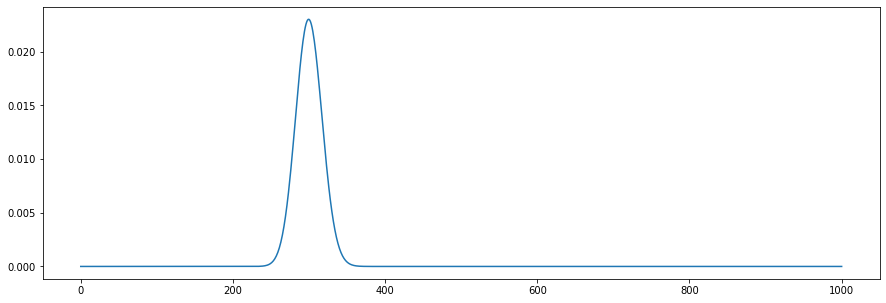

In [13]:
# your code here
x = range(0,1001)

plt.figure(figsize=(15,5))
plt.plot((range(1001)), poisson.pmf(range(1001), 300), '-', ms=8, label='binom pmf')

Como podemos ver la probabilidad disminuye a medida que la muestra se aleja de la media